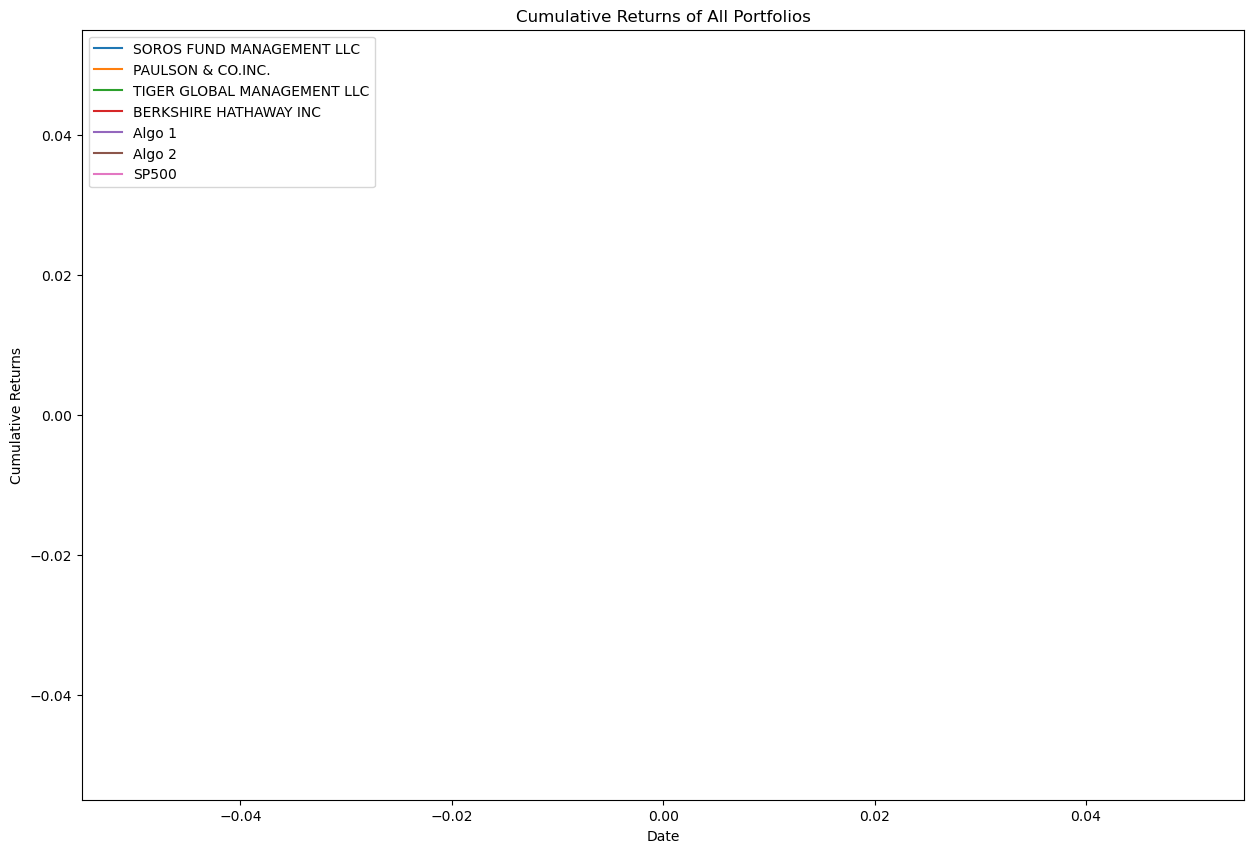

C:\Users\jan\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\jan\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\jan\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


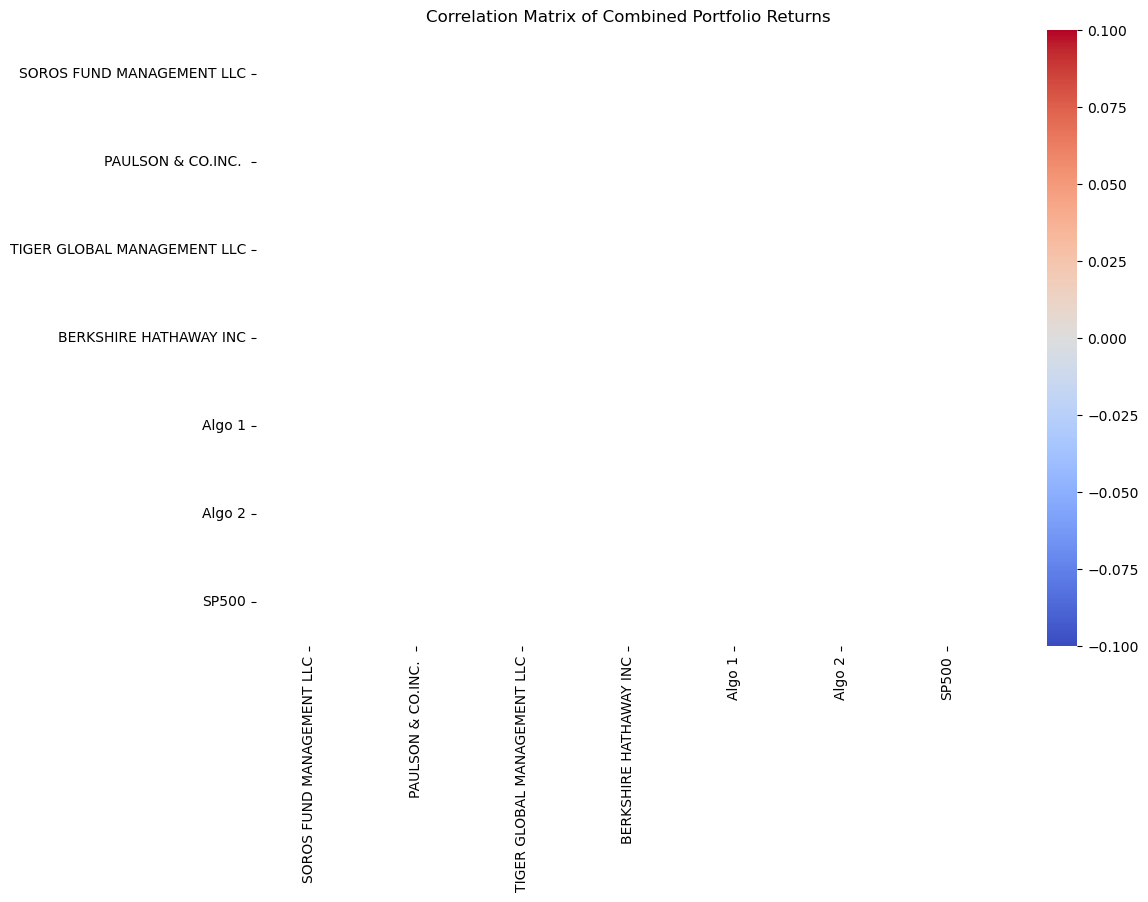

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV files and ensure date parsing with specified format
whale_returns = pd.read_csv('whale_returns.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date').dropna()
algo_returns = pd.read_csv('algo_returns.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date').dropna()
sp500_history = pd.read_csv('sp500_history.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date').dropna()
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').astype(float)
sp500_returns = sp500_history['Close'].pct_change().dropna()

# Combine into a single DataFrame
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns.rename('SP500')], axis=1).dropna()

# Calculate cumulative returns
cumulative_returns = (1 + combined_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(15, 10))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)
plt.title('Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate and plot the correlation matrix
correlation_matrix = combined_returns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Combined Portfolio Returns')
plt.show()
